<a href="https://colab.research.google.com/github/jpatrickweller/Data_Challenges/blob/main/Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

### Now I'll try to predict stock prices!

In [ ]:
import yfinance as yf

# define ticker symbol
tickerSymbol = 'SPY'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# get the historical stock prices for the ticker
tickerdf = tickerData.history(period='1d',start='2015-1-1', end='2020-01-01')

In [ ]:
tickerdf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,183.591679,184.036470,181.634591,182.746567,121465900,0.0,0
2015-01-05,181.625729,181.803642,179.117118,179.446259,169632600,0.0,0
2015-01-06,179.775412,180.335852,176.902069,177.756073,209151400,0.0,0
2015-01-07,179.179389,180.335847,178.699021,179.971115,125346700,0.0,0
2015-01-08,181.483396,183.396003,181.465614,183.164703,147217800,0.0,0


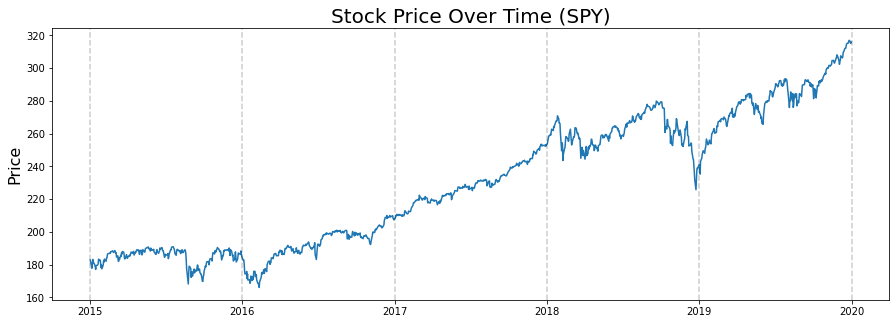

In [ ]:
# Plot the data

def plot_stock_price(df, col, tickerSymbol):

    plt.figure(figsize=(15,5))
    plt.plot(df[col])
    plt.title(f'Stock Price Over Time ({tickerSymbol})', fontsize=20)
    plt.ylabel('Price', fontsize=16)
    for year in range(2015, 2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=.2)

plot_stock_price(tickerdf, 'Close', tickerSymbol)

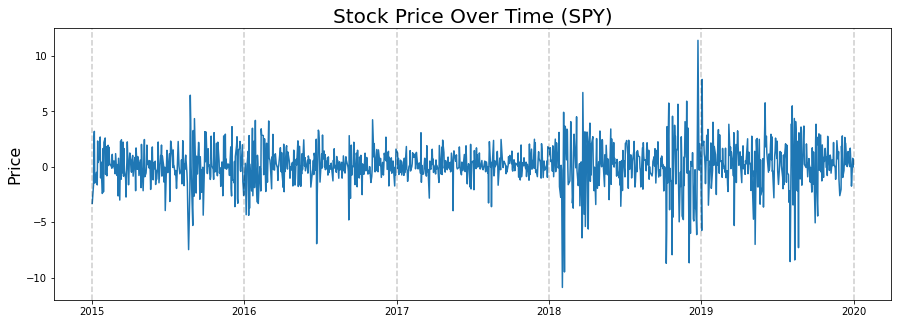

In [ ]:
# Going to use an integrated function to correct for the trend
first_diffs = tickerdf.Close.values[1:] - tickerdf.Close[:-1]
first_diffs = np.concatenate([first_diffs, [0]])
# first_diffs.fillna(0,inplace=True)

tickerdf['FirstDifference'] = first_diffs
plot_stock_price(tickerdf,'FirstDifference', tickerSymbol)


Ok, looks pretty good! Mean is floating around 0, but still need to check that variance. Looking at the ACF to see if its stationary.

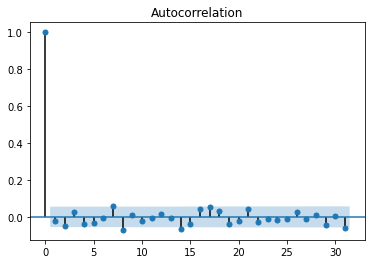

In [ ]:
acfplot = plot_acf(tickerdf.FirstDifference)

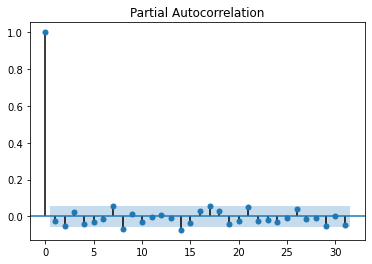

In [ ]:
pacfplot = plot_pacf(tickerdf.FirstDifference)

Hmm, well this is why predicting stock prices is really hard. Not much in either ACF or PACF.